In [56]:
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Dataset

In [57]:
def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # Generate X
    y = torch.matmul(X, w) + b  # calculate y from X
    y += torch.normal(0, 0.01, y.shape) # noise of normal distribution of std 0.01
    return X, y.reshape((-1, 1))

In [58]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [59]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.7856, -1.4628]) 
label: tensor([5.6034])


<Axes: xlabel='None', ylabel='None'>

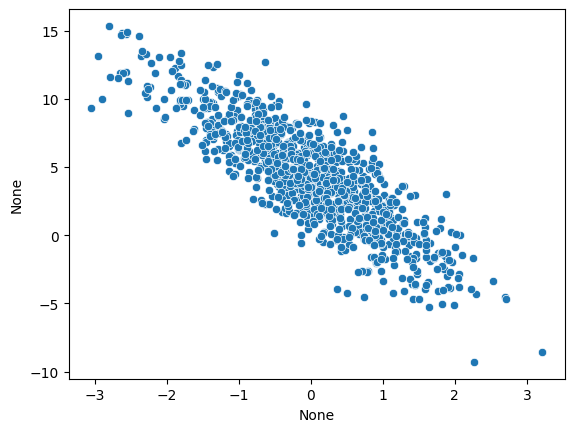

In [60]:
sns.scatterplot(x = features[:,1], y = labels.flatten())

### Reading Dataset

In [61]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
        indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [62]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 8.0587e-01, -5.6855e-01],
        [ 9.0662e-01,  1.5873e+00],
        [-2.6340e+00, -3.0551e+00],
        [-3.1132e-01,  8.9513e-01],
        [ 9.3976e-02,  7.0989e-01],
        [-1.0447e+00,  2.8959e-01],
        [-1.5964e-01, -5.3283e-01],
        [-3.5940e-01, -5.7818e-01],
        [ 1.6942e+00,  8.0596e-01],
        [ 9.0479e-01, -2.8893e-03]]) 
 tensor([[7.7398],
        [0.6165],
        [9.3251],
        [0.5378],
        [1.9733],
        [1.1461],
        [5.6861],
        [5.4294],
        [4.8400],
        [6.0314]])


### Initializing model Parameters

In [63]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [64]:
# Model
def linreg(X, w, b): #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [65]:
# Loss Function
def squared_loss(y_hat, y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [66]:
def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Training

In [67]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [68]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.038074
epoch 2, loss 0.000140
epoch 3, loss 0.000048


In [69]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0001, -0.0006], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)
